# Marketing Analytics Case Study

## How does a Bike-Share company navigate speedy success? 
### Case Study - Google Data Analytics Certificate


### Company Background

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Lily Moreno (Director of Marketing) believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Business Task 
Q: How do annual members and casual riders use Cyclistic bikes differently?

### Setting up Environment

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
getwd()

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



[1] "C:/Users/alihs/Documents/Analytics Courses/R New Project 01/Case 1 - Cyclist Bike Study"

### Collecting Data

In [2]:
# Uploading datasets

q2_2019 <- read.csv("Trips_2019_Q2.csv")
q3_2019 <- read.csv("Trips_2019_Q3.csv")
q4_2019 <- read.csv("Trips_2019_Q4.csv")
q1_2020 <- read.csv("Trips_2020_Q1.csv")

### Combining Data

In [3]:
# Comparing column names

colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "duration"           "start_station_id"  
 [7] "start_station_name" "end_station_id"     "end_station_name"  
[10] "member_casual"      "gender"             "birthday_year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
# Renaming Columns

q4_2019 <- rename(q4_2019
                 ,ride_id = trip_id
                 ,rideable_type = bikeid
                 ,started_at = start_time
                 ,ended_at = end_time
                 ,start_station_name = from_station_name
                 ,start_station_id = from_station_id
                 ,end_station_name = to_station_name
                 ,end_station_id = to_station_id
                 ,member_casual = usertype)

In [5]:
q3_2019 <- rename(q3_2019
                 ,ride_id = trip_id
                 ,rideable_type = bikeid
                 ,started_at = start_time
                 ,ended_at = end_time
                 ,start_station_name = from_station_name
                 ,start_station_id = from_station_id
                 ,end_station_name = to_station_name
                 ,end_station_id = to_station_id
                 ,member_casual = usertype)

In [6]:
# Inspecting dataframes to look for any incongruencies

str(q1_2020)

'data.frame':	426887 obs. of  13 variables:
 $ ride_id           : Factor w/ 426887 levels "000054ABAD1C067C",..: 391813 240149 201495 336393 247366 183167 83476 271661 157400 43116 ...
 $ rideable_type     : Factor w/ 1 level "docked_bike": 1 1 1 1 1 1 1 1 1 1 ...
 $ started_at        : Factor w/ 399265 levels "2020-01-01 00:04:44",..: 89046 126625 43584 23366 125179 46802 46949 44870 132970 131198 ...
 $ ended_at          : Factor w/ 399532 levels "2020-01-01 00:10:54",..: 89084 126692 43537 23315 125199 46751 46895 44838 133007 131293 ...
 $ start_station_name: Factor w/ 607 levels "2112 W Peterson Ave",..: 583 130 45 133 143 566 193 193 566 126 ...
 $ start_station_id  : int  239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : Factor w/ 603 levels "","2112 W Peterson Ave",..: 127 497 586 220 562 193 562 562 193 417 ...
 $ end_station_id    : int  326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num  42 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7

In [7]:
str(q4_2019)

'data.frame':	704054 obs. of  12 variables:
 $ ride_id           : int  25223640 25223641 25223642 25223643 25223644 25223645 25223646 25223647 25223648 25223649 ...
 $ started_at        : Factor w/ 633380 levels "2019-10-01 00:01:39",..: 1 2 3 3 4 5 6 7 8 8 ...
 $ ended_at          : Factor w/ 632834 levels "2019-10-01 00:06:34",..: 5 1 7 36 26 2 10 16 18 101 ...
 $ rideable_type     : int  2215 6328 3003 3275 5294 1891 1061 1274 6011 2957 ...
 $ tripduration      : Factor w/ 10401 levels "1,000.0","1,001.0",..: 10322 3628 9774 2691 888 5024 76 472 451 9370 ...
 $ start_station_id  : int  20 19 84 313 210 156 84 156 156 336 ...
 $ start_station_name: Factor w/ 610 levels "2112 W Peterson Ave",..: 476 538 392 323 25 140 392 140 140 159 ...
 $ end_station_id    : int  309 241 199 290 382 226 142 463 463 336 ...
 $ end_station_name  : Factor w/ 608 levels "2112 W Peterson Ave",..: 340 406 553 293 579 442 371 118 118 158 ...
 $ member_casual     : Factor w/ 2 levels "Customer","Subscriber

In [8]:
str(q3_2019)

'data.frame':	1640718 obs. of  12 variables:
 $ ride_id           : int  23479388 23479389 23479390 23479391 23479392 23479393 23479394 23479395 23479396 23479397 ...
 $ started_at        : Factor w/ 1372358 levels "2019-07-01 00:00:27",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ended_at          : Factor w/ 1344539 levels "2019-07-01 00:07:31",..: 6 2 13 12 7 1 8 15 17 19 ...
 $ rideable_type     : int  3591 5353 6180 5540 6014 4941 3770 5442 2957 6091 ...
 $ tripduration      : Factor w/ 16676 levels "1,000.0","1,001.0",..: 243 54 610 557 241 8361 281 606 642 648 ...
 $ start_station_id  : int  117 381 313 313 168 300 168 313 43 43 ...
 $ start_station_name: Factor w/ 612 levels "2112 W Peterson Ave",..: 595 590 323 323 376 47 376 323 386 386 ...
 $ end_station_id    : int  497 203 144 144 62 232 62 144 195 195 ...
 $ end_station_name  : Factor w/ 613 levels "2112 W Peterson Ave",..: 304 581 334 334 376 433 376 334 153 153 ...
 $ member_casual     : Factor w/ 2 levels "Customer","Subscriber": 2

In [9]:
str(q2_2019)

'data.frame':	1048575 obs. of  12 variables:
 $ ride_id           : int  22178529 22178530 22178531 22178532 22178533 22178534 22178535 22178536 22178537 22178538 ...
 $ started_at        : Factor w/ 101769 levels "2019-04-01 0:02",..: 1 2 3 4 5 5 6 7 8 8 ...
 $ ended_at          : Factor w/ 102075 levels "2019-04-01 0:09",..: 1 4 2 3 7 5 6 7 10 10 ...
 $ rideable_type     : int  6251 6226 5649 4151 3270 3123 6418 4513 3280 5534 ...
 $ duration          : Factor w/ 13378 levels "1,000.00","1,001.00",..: 7430 53 4778 6152 8 4785 8737 6250 3598 3581 ...
 $ start_station_id  : int  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: Factor w/ 610 levels "2112 W Peterson Ave",..: 166 606 335 373 249 215 204 292 511 511 ...
 $ end_station_id    : int  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : Factor w/ 612 levels "2112 W Peterson Ave",..: 195 558 86 304 44 217 98 306 512 512 ...
 $ member_casual     : Factor w/ 2 levels "Customer","Subscriber": 2 2 2 2 2 

In [10]:
# Convert ride_id and rideable_type to character so that they can stack correctly.

q4_2019 <- mutate(q4_2019, ride_id = as.character(ride_id)
                 ,rideable_type = as.character(rideable_type))

q3_2019 <- mutate(q3_2019, ride_id = as.character(ride_id)
                 ,rideable_type = as.character(rideable_type))

q2_2019 <- mutate(q2_2019, ride_id = as.character(ride_id)
                 ,rideable_type = as.character(rideable_type))

In [11]:
# Stack individual quarters dataframes into one big data frame

all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning mess

In [12]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,duration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthday_year,tripduration,birthyear,start_lat,start_lng,end_lat,end_lng
22178529,2019-04-01 0:02,2019-04-01 0:09,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975,NA,NA,NA,NA,NA,NA
22178530,2019-04-01 0:03,2019-04-01 0:20,6226,"1,048.00",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984,NA,NA,NA,NA,NA,NA
22178531,2019-04-01 0:11,2019-04-01 0:15,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990,NA,NA,NA,NA,NA,NA
22178532,2019-04-01 0:13,2019-04-01 0:18,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993,NA,NA,NA,NA,NA,NA
22178533,2019-04-01 0:19,2019-04-01 0:36,3270,"1,007.00",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992,NA,NA,NA,NA,NA,NA
22178534,2019-04-01 0:19,2019-04-01 0:23,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999,NA,NA,NA,NA,NA,NA


In [13]:
# Remove lat, long, birthyear, gender and duration fields

all_trips <- all_trips  %>% 
            select(-c(start_lat,
                      start_lng,
                      end_lat,
                      end_lng,
                      birthyear,
                      gender,
                      duration,
                      birthday_year,
                      tripduration))

In [14]:
# Inspect that all relevant fields are included 

head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
22178529,2019-04-01 0:02,2019-04-01 0:09,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 0:03,2019-04-01 0:20,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 0:11,2019-04-01 0:15,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 0:13,2019-04-01 0:18,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 0:19,2019-04-01 0:36,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 0:19,2019-04-01 0:23,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


### Cleaning up data

In [15]:
# Inspect the new table

colnames(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

In [16]:
# number of rows in the table
nrow(all_trips)

[1] 3820234

In [17]:
# dimensions of the dataframe
dim(all_trips)

[1] 3820234       9

In [18]:
# Statistical summary of data
summary(all_trips)

   ride_id           started_at          ended_at         rideable_type     
 Length:3820234     Length:3820234     Length:3820234     Length:3820234    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_id start_station_name end_station_id  end_station_name  
 Min.   :  1.0    Length:3820234     Min.   :  1.0   Length:3820234    
 1st Qu.: 77.0    Class :character   1st Qu.: 77.0   Class :character  
 Median :174.0    Mode  :character   Median :174.0   Mode  :character  
 Mean   :202.9                       Mean   :203.7                     
 3rd Qu.:290.0          

In the member_casual column, we need to replace the verbiage 'Subscriber' with 'member' and 'customer' with 'casual'. 'Subscriber' and 'Customer' were the old labels for these titles. 

In [19]:
# See how many observations fall under each category
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480     833822     378407    2559525 

In [20]:
# Reassign the labels

all_trips <- all_trips  %>% 
            mutate(member_casual = recode(member_casual
                                         , "Subscriber" = "member"
                                         , "Customer" = "casual"))

In [21]:
# Check to ensure reassingnment
table(all_trips$member_casual)


 casual  member 
 882302 2937932 

Next, we will add columns that list the date, month, day and year of each ride, which will allow additional aggregation of the data.

In [22]:
# Adding date

all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date),"%A")

In [23]:
# Adding ride length column to dataframe

all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

In [24]:
# Inspect the structure of the column

str(all_trips)

'data.frame':	3820234 obs. of  15 variables:
 $ ride_id           : chr  "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : chr  "2019-04-01 0:02" "2019-04-01 0:03" "2019-04-01 0:11" "2019-04-01 0:13" ...
 $ ended_at          : chr  "2019-04-01 0:09" "2019-04-01 0:20" "2019-04-01 0:15" "2019-04-01 0:18" ...
 $ rideable_type     : chr  "6251" "6226" "5649" "4151" ...
 $ start_station_id  : int  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : int  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr  "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ date              : Date, format: "2019-04-01" "2019-04-01" ...
 $ month             : chr  "04" "04" "04" "04" ...
 $ day         

In [25]:
# Convert ride_length from factor to numeric

is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

In [26]:
# Removing 'bad data' as some entries were taken out of service or ride length was negative

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length < 0),]

In [27]:
tail(all_trips_v2)

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
3820227,4361A2348584C3E4,2020-03-25 17:10:10,2020-03-25 17:47:34,docked_bike,313,Lakeview Ave & Fullerton Pkwy,459,Lakefront Trail & Bryn Mawr Ave,member,2020-03-25,03,25,2020,Wednesday,2220
3820228,005D3BC2A3B33DDA,2020-03-12 07:32:25,2020-03-12 07:38:44,docked_bike,91,Clinton St & Washington Blvd,47,State St & Kinzie St,member,2020-03-12,03,12,2020,Thursday,360
3820231,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240,Sheridan Rd & Irving Park Rd,member,2020-03-07,03,07,2020,Saturday,2940
3820232,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210,Ashland Ave & Division St,casual,2020-03-01,03,01,2020,Sunday,1560
3820233,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264,Stetson Ave & South Water St,member,2020-03-07,03,07,2020,Saturday,660
3820234,064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,docked_bike,110,Dearborn St & Erie St,85,Michigan Ave & Oak St,casual,2020-03-08,03,08,2020,Sunday,1740


### Conducting Descriptive Analysis

In [28]:
# Descriptive analysis on ride_length 

mean(all_trips_v2$ride_length)
median(all_trips_v2$ride_length)
max(all_trips_v2$ride_length)
min(all_trips_v2$ride_length)

[1] 1476.819

[1] 720

[1] 9383400

[1] 0

In [29]:
summary(all_trips_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     420     720    1477    1260 9383400 

In [30]:
# Compare members and casual riders

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,3575.3985
member,849.2796


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,1560
member,600


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,9383400
member,9056640


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,0
member,0


In [31]:
# See average ride time by each day for members vs casual users

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,Friday,3822.7908
member,Friday,824.4129
casual,Monday,3372.3583
member,Monday,842.5924
casual,Saturday,3362.6271
member,Saturday,968.1321
casual,Sunday,3608.0002
member,Sunday,919.1142
casual,Thursday,3706.0930
member,Thursday,822.8557


In [32]:
# Order the days of the week

all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels = c("Sunday","Monday",
                                                                         "Tuesday","Wednesday",
                                                                         "Thursday","Friday",
                                                                         "Saturday"))

In [33]:
# Analyze ridership data by type and weekday

all_trips_v2  %>% 
    mutate(weekday = wday(started_at, label = TRUE))  %>%   # creates weekday field using wday()
    group_by(member_casual, weekday) %>%                    # groups by usertype and weekday
    summarize(number_of_rides =n()                          # calculates the number of rides
             ,average_duration = mean(ride_length)) %>%     # calculates average duration
    arrange(member_casual, weekday)                         # sorts

member_casual,weekday,number_of_rides,average_duration
casual,Sun,174768,3608.0002
casual,Mon,103296,3372.3583
casual,Tue,90510,3596.3971
casual,Wed,92457,3719.0577
casual,Thu,101142,3706.0930
casual,Fri,117753,3822.7908
casual,Sat,198604,3362.6271
member,Sun,260608,919.1142
member,Mon,472196,842.5924
member,Tue,508445,826.1502


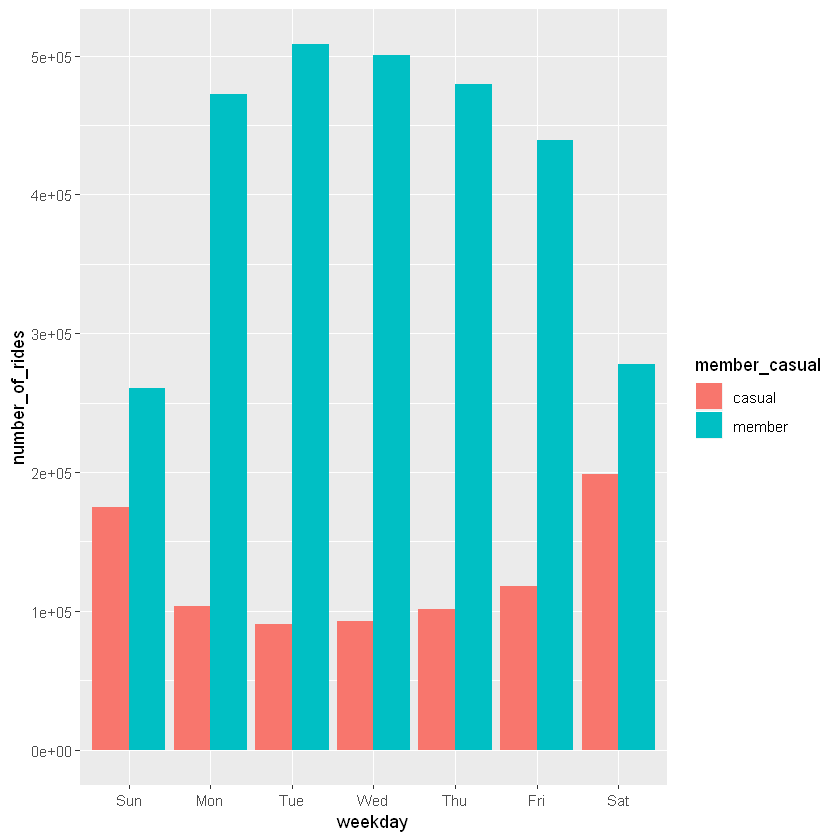

In [34]:
# Visualize the number of rides by rider type

all_trips_v2 %>% 
    mutate(weekday = wday(started_at, label = TRUE))  %>% 
    group_by(member_casual, weekday)  %>% 
    summarize(number_of_rides = n(),
              average_duration = mean(ride_length)) %>% 
    arrange(member_casual, weekday)  %>% 
    ggplot(aes(weekday, number_of_rides, fill = member_casual))+
    geom_col(position = "dodge")

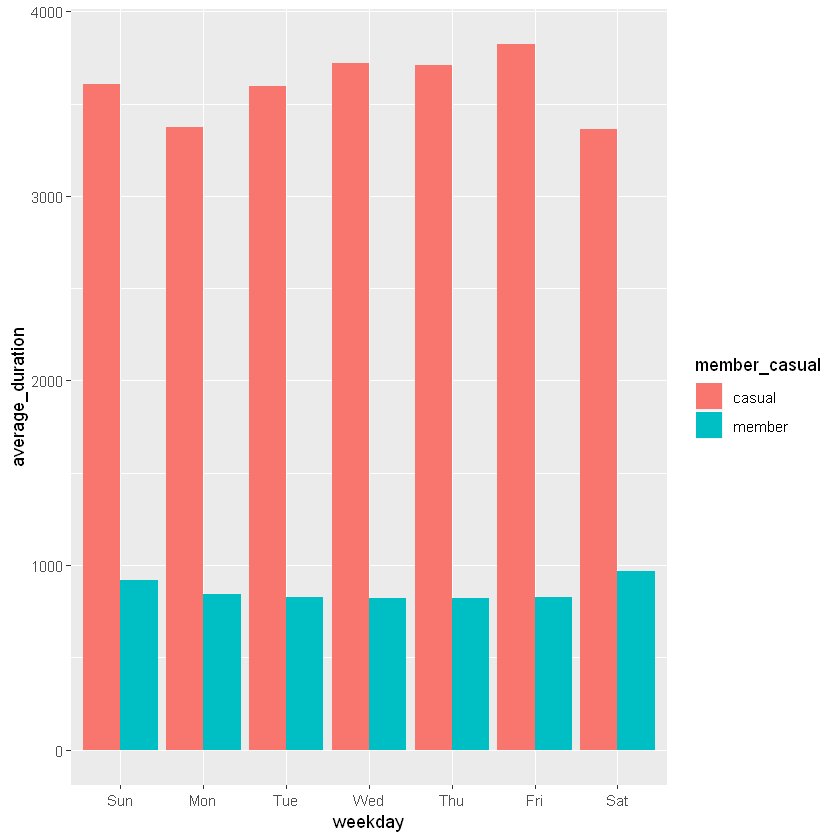

In [35]:
# Visualization for average duration

all_trips_v2  %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual, weekday)  %>% 
    summarize(number_of_rides = n(),
             average_duration = mean(ride_length)) %>% 
    arrange(member_casual, weekday) %>% 
    ggplot(aes(weekday, average_duration, fill = member_casual))+
    geom_col(position = "dodge")

### Export summary file for further analysis

In [36]:
# Create csv file that we can visualize in Excel, Tableau or any other presentation software

counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'C:\\Users\\alihs\\Documents\\R New Project 01\\Case 1 - Cyclist Bike Study\\avg_ride_length.csv')

Warning message in file(file, ifelse(append, "a", "w")):
"cannot open file 'C:\Users\alihs\Documents\R New Project 01\Case 1 - Cyclist Bike Study\avg_ride_length.csv': No such file or directory"

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


### Key Steps Taken

*Data Wrangling (Combining data into one file)*
1. Renamed Columns
2. Converted column data types to the same 
3. Stacked all individual dataframes into one big dataframe
4. Removed unrequired columns

*Data Cleaning*
1. Changed all labels in 'member_type' to same categories (i.e. member and casual)
2. Parsed out the date into date, month, year, day_of_week
3. Added column with calculation
4. Converted data type of column 
5. Filtered out unnecessary data

*Data Analysis*
1. Calculated Mean/Median/Max/Min of ride length
2. Compared ride times by the week day
3. Calculated average ride time by member type
4. Analyzed ridership by type and weekday
5. Prepared graphs 